# Projeto Ciência de Dados - Previsão de Preços

- O objetivo da atividade é fazer a previsão do preço de um produto x que iremos vender baseado nas características, como: ano, tamanho, tipo, usado ou novo, qual material e etc. 

#### Passo a Passo de um Projeto de Ciência de Dados

- Passo 1: Entendimento do Desafio
- Passo 2: Entendimento da Área/Empresa


![title](tabelas.png)

In [1]:
# Passo 3: importação/extreção da base de dados
# Passo 4: Não foi necessário o ajuste de Dados (Tratamento/Limpeza)

import pandas as pd

tabela = pd.read_csv('barcos_ref.csv')

display(tabela)
print(tabela.info())



,Preco,TipoBarco,TipoVenda,Ano,Comprimento,Largura,Material
0,3490,1,1,2020,4.00,1.50,1
1,3399,2,1,2019,3.55,1.46,2
2,3600,3,2,1999,6.20,2.38,2
3,3500,2,2,1987,4.35,1.75,3
4,3500,4,2,2004,4.70,2.00,3
...,...,...,...,...,...,...,...
7644,5000,7,2,1974,7.20,2.70,3
7645,4999,4,2,1980,6.00,2.10,3
7646,4950,2,2,1984,6.00,1.62,5
7647,4499,4,1,2020,4.40,1.80,3


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7649 entries, 0 to 7648
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Preco        7649 non-null   int64  
 1   TipoBarco    7649 non-null   int64  
 2   TipoVenda    7649 non-null   int64  
 3   Ano          7649 non-null   int64  
 4   Comprimento  7649 non-null   float64
 5   Largura      7649 non-null   float64
 6   Material     7649 non-null   int64  
dtypes: float64(2), int64(5)
memory usage: 418.4 KB
None


,Preco
Preco,1.000000
TipoBarco,0.293137
TipoVenda,0.041266
Ano,0.113385
Comprimento,0.578353
Largura,0.557621
Material,-0.036476


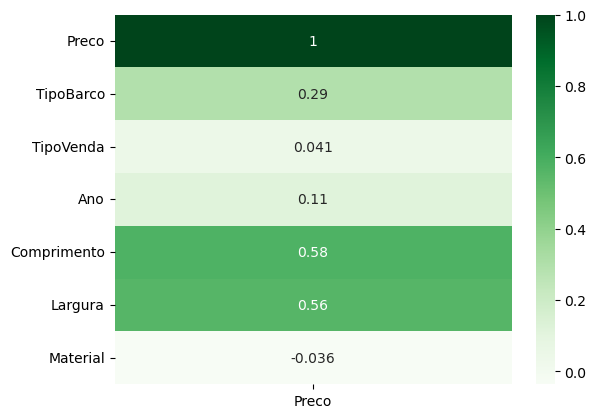

In [2]:
# Passo 5: Análise Exploratória

display(tabela.corr()[['Preco']])


import seaborn as sns
import matplotlib.pyplot as plt

#Criação

sns.heatmap(tabela.corr()[['Preco']], cmap='Greens', annot=True)

#Exibição
plt.show()

In [3]:
# Passo 6: Modelagem + Algoritmos (Aqui que entra a Inteligência Artificial, se necessário)

# Y previsão de preço e x dados utilizados para a previsão

y = tabela['Preco']
x = tabela.drop('Preco', axis=1)

from sklearn.model_selection import train_test_split

x_treino, x_teste, y_treino, y_teste = train_test_split(x, y, test_size=0.3)


In [4]:
# Importação das IA's

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

# Criação das IA's

modelo_regressaolinear = LinearRegression()
modelo_arvoredecisao = RandomForestRegressor()

# Treino das IA's

modelo_regressaolinear.fit(x_treino,  y_treino)
modelo_arvoredecisao.fit(x_treino,  y_treino)

RandomForestRegressor()

In [7]:
previsao_regressaolinear = modelo_regressaolinear.predict(x_teste)
previsao_arvoredecisao = modelo_arvoredecisao.predict(x_teste)

from sklearn.metrics import r2_score

print(r2_score(y_teste, previsao_regressaolinear))
print(r2_score(y_teste, previsao_arvoredecisao))

0.4280145410662548
0.8760045911065486


In [26]:
# Fazendo previsão de novos barcos

tabela_nova = pd.read_csv('novos_barcos.csv')
display(tabela_nova)

previsao = modelo_arvoredecisao.predict(tabela_nova)
print(previsao)



,TipoBarco,TipoVenda,Ano,Comprimento,Largura,Material
0,2,3,2023,3.0,1.5,1
1,2,1,2023,3.8,1.9,2
2,3,2,1999,6.2,3.0,2


[ 5872.69        9764.98666667 22728.1       ]
